# Calculate Number of Tropical Nights

This notebook computes the Tropical Nights index: starting from the daily minimum temperature (2096-2100) TN,
the Tropical Nights index is the number of days where TN > T (T is  a reference temperature, e.g. 20°C)

In [8]:
import xarray as xr

Import source data (minimum temperature K)

In [9]:
# Load Data with the open_dataset() xarray method
src_path='/work/bk1088/k204228/Climate-data-analysis-service/tasmin_day_CMCC-CESM_rcp85_r1i1p1_20960101-21001231.nc'
ds = xr.open_dataset(src_path)

# Open variable "tasmax" over the whole time range
ds_tasmin = ds["tasmin"]

Select Year

In [10]:
year = "2096"
ds_tasmin_year = ds_tasmin.sel(time=year)

Count the number of tropical nights

In [11]:
ds_tasmin_year_count = ds_tasmin_year.where(ds_tasmin_year > 293.15).count(dim='time')

Before Plotting a cyclic point has to be added, otherwise there will be a gap at the prime meridian

In [12]:

lon = ds_tasmin_year_count.lon
lat = ds_tasmin_year_count.lat
ds_tasmin_year_count, lon = add_cyclic_point(ds_tasmin_year_count, lon)

Plot Data with Cartopy

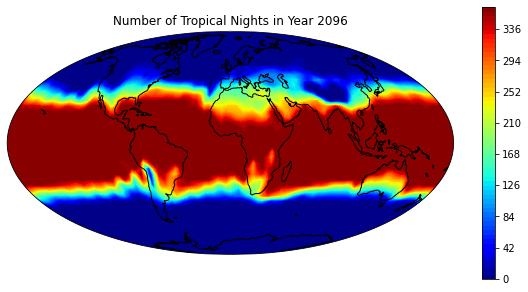

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide())

    plt.contourf(lon, lat, ds_tasmin_year_count, 60,
                transform=ccrs.PlateCarree(),
                cmap='jet')
    ax.coastlines()
    ax.set_global()
    
    # Add a color bar
    plt.colorbar(ax=ax)
    plt.title('Number of Tropical Nights in Year ' +year)
    plt.show()


if __name__ == '__main__':
    main()